In [2]:
import pandas as pd
import h5py
from sklearn.preprocessing import LabelEncoder
import os

# Load data
data_path = r"C:\Users\sagni\Downloads\CrowdAssist\emergency_service_routing_with_timestamps.csv"
df = pd.read_csv(data_path)

# Clean missing values
df.dropna(subset=['Timestamp', 'Incident_Severity', 'Incident_Type', 'Label'], inplace=True)

# Encode categorical columns
categorical_cols = [
    'Incident_Severity', 'Incident_Type', 'Region_Type', 'Traffic_Congestion',
    'Weather_Condition', 'Drone_Availability', 'Ambulance_Availability',
    'Air_Traffic', 'Specialist_Availability', 'Road_Type',
    'Emergency_Level', 'Weather_Impact', 'Dispatch_Coordinator', 'Label'
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Drop non-numeric column
df.drop(columns=['Timestamp'], inplace=True)

# Split features and labels
X = df.drop(columns=['Label']).values
y = df['Label'].values

# ✅ Save to .h5 file
with h5py.File('processed_emergency_data.h5', 'w') as hf:
    hf.create_dataset('features', data=X)
    hf.create_dataset('labels', data=y)

print("✅ H5 file created: processed_emergency_data.h5")


✅ H5 file created: processed_emergency_data.h5


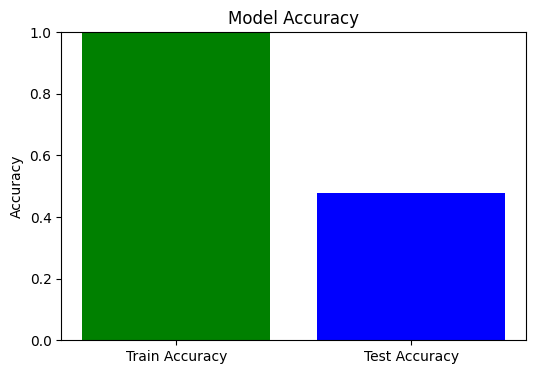

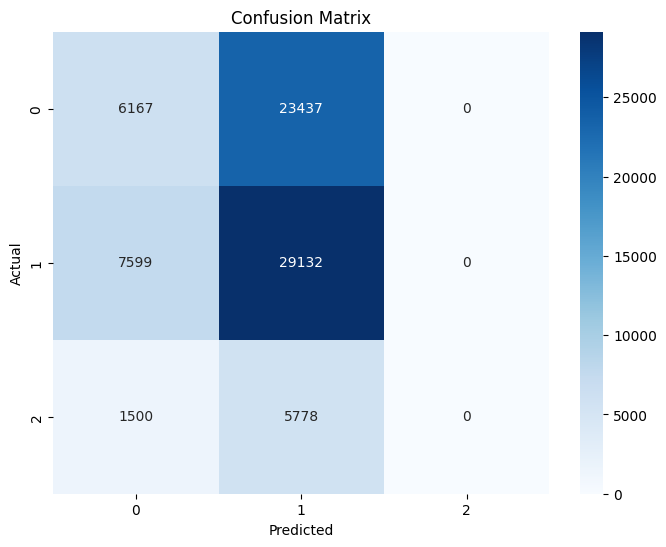

In [3]:
# Load and evaluate
import h5py
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load H5 data
with h5py.File('processed_emergency_data.h5', 'r') as hf:
    X = hf['features'][:]
    y = hf['labels'][:]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Accuracy
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))

# 📊 Accuracy bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [acc_train, acc_test], color=['green', 'blue'])
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

# 📊 Confusion matrix heatmap
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
